# Analyzing Suicide Rates from 1985 to 2016

## About Dataset

This dataset, sourced from Kaggle, provides comprehensive information on suicides spanning the years 1985 to 2016. It encompasses various demographics and socio-economic indicators, offering insights into suicide trends across different countries and time periods.

Key features of the dataset include:
* Country: The country where the suicides occurred.
* Year: The specific year of the recorded suicides.
* Sex: Gender classification of the individuals involved.
* Age: Categorization based on age groups.
* Suicides_no: Total count of reported suicides.
* Population: Population count corresponding to the demographic group.
* Suicides/100k pop: Suicide rate per 100,000 population.
* GDP_per_capita ($): GDP per capita for the respective year.
* Generation: Generational cohort of the individuals involved.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv(r"Suicide_Cases\master.csv",encoding='unicode_escape')
df.head()

,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Data Cleaning

In [19]:
df.rename(columns={"ï»¿country":"country"})
df.head(3)

,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ï»¿country          27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df.shape

(27820, 12)

In [6]:
df.isna().sum()

ï»¿country                0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Dropping the columns that is not relevant for EDA


In [7]:
drop=df.drop(['HDI for year','country-year'], axis=1)
drop.head()

,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


Data is clean now


## Exploratory Data Analysis

### Suicides based on gender and age group.

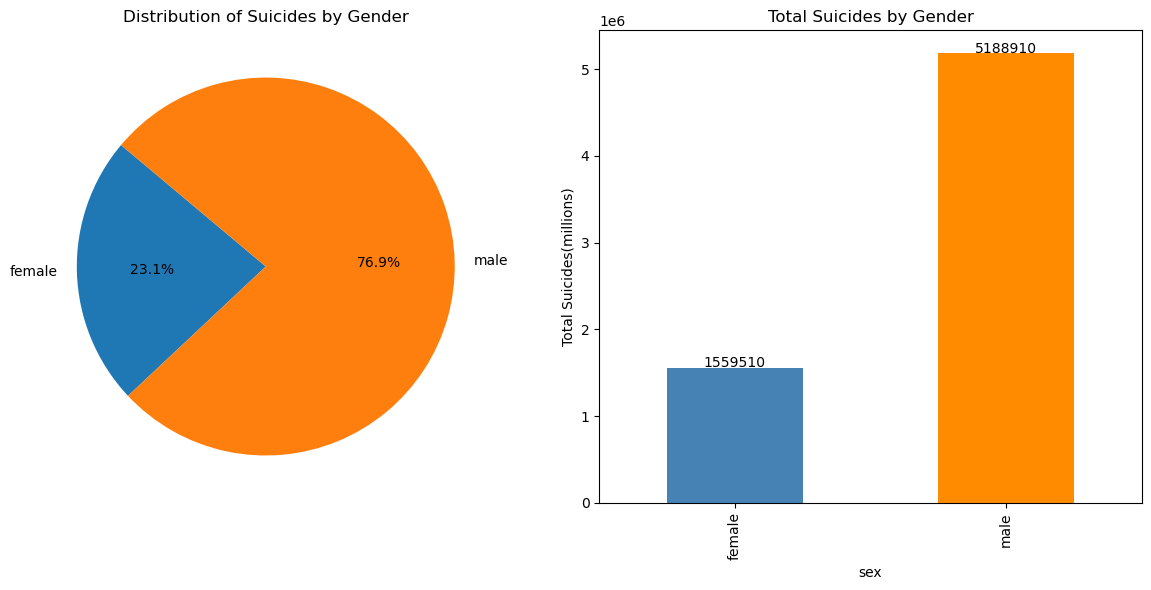

In [8]:
suicides_by_gender = df.groupby('sex')['suicides_no'].sum()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plot 1: Pie chart of suicides based on sex/gender
axs[0].pie(suicides_by_gender, labels=suicides_by_gender.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Suicides by Gender')
# Plot 2: Bar plot based on sex/gender showing total suicides
suicides_by_gender.plot(kind='bar', ax=axs[1], color=['steelblue', 'darkorange'])
axs[1].set_title('Total Suicides by Gender')
axs[1].set_ylabel('Total Suicides(millions)')
for i, v in enumerate(suicides_by_gender):
    axs[1].text(i, v + 1000, str(v), ha='center')
plt.tight_layout()
plt.show()


Male suicides are much higher than female suicides

### Age vs Sex

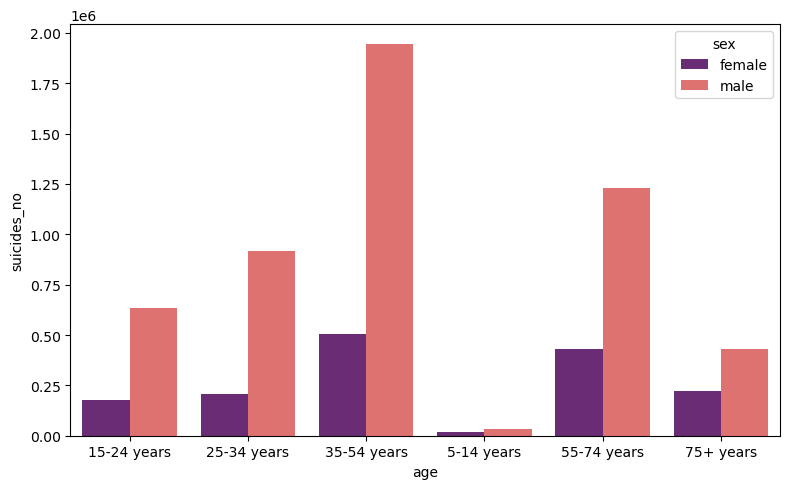

In [9]:
plt.figure(figsize=(8, 5))
suicides_by_age_gender = df.groupby(['age', 'sex'])['suicides_no'].sum().reset_index()
sns.barplot(x='age', y='suicides_no', hue='sex', data=suicides_by_age_gender, palette='magma')
plt.tight_layout()

Ratio of suicides is amoung more in age between than 35 and 54.

### Generations

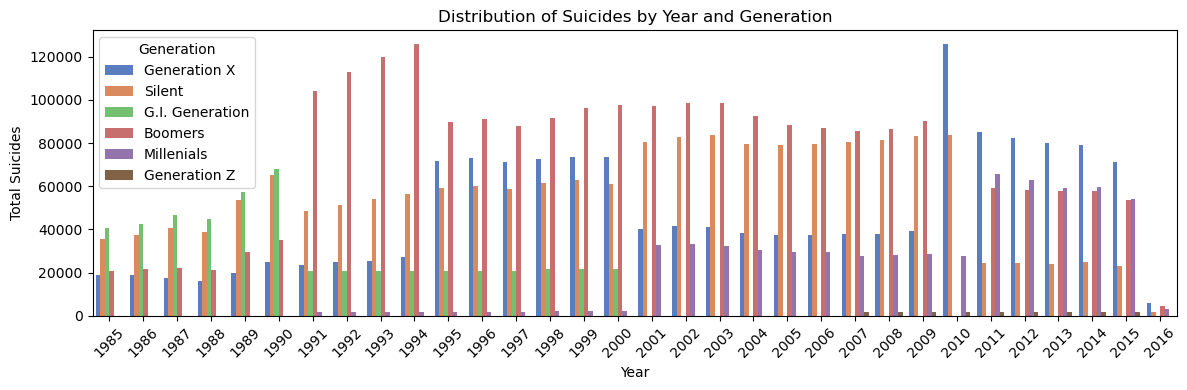

In [18]:
plt.figure(figsize=(12, 4))
sns.barplot(data=df, x='year', y='suicides_no', hue='generation', estimator=sum, errorbar=None, palette='muted')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title('Distribution of Suicides by Year and Generation')
plt.legend(title='Generation', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distributions of suicide by countries

#### Average of suicide by countries

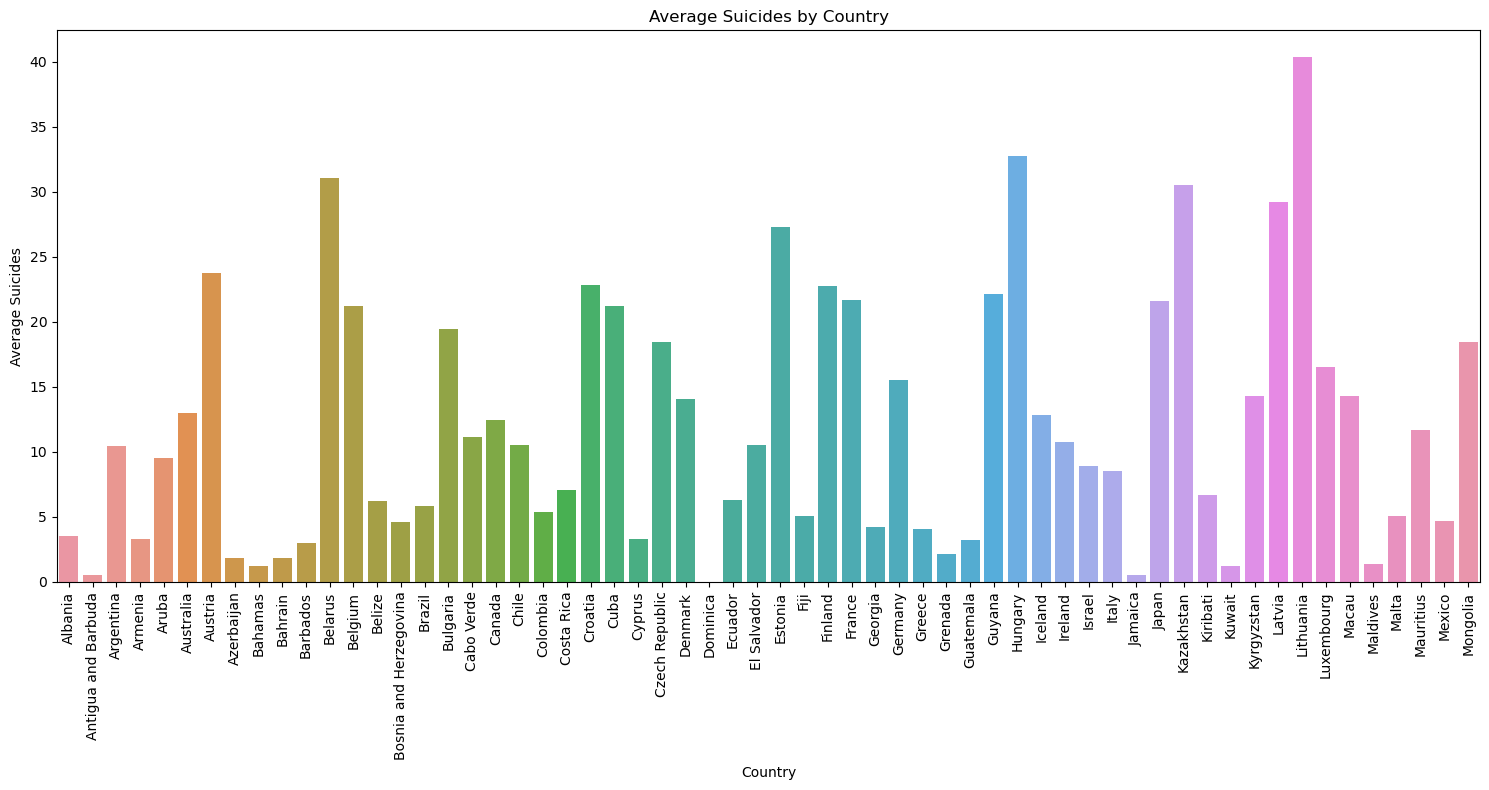

In [11]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df.groupby('country')['suicides/100k pop'].mean().reset_index().head(60), x='ï»¿country', y='suicides/100k pop', errorbar=None)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Suicides')
plt.title('Average Suicides by Country')
plt.tight_layout()
plt.show()

#### Top countries with highest total suicides

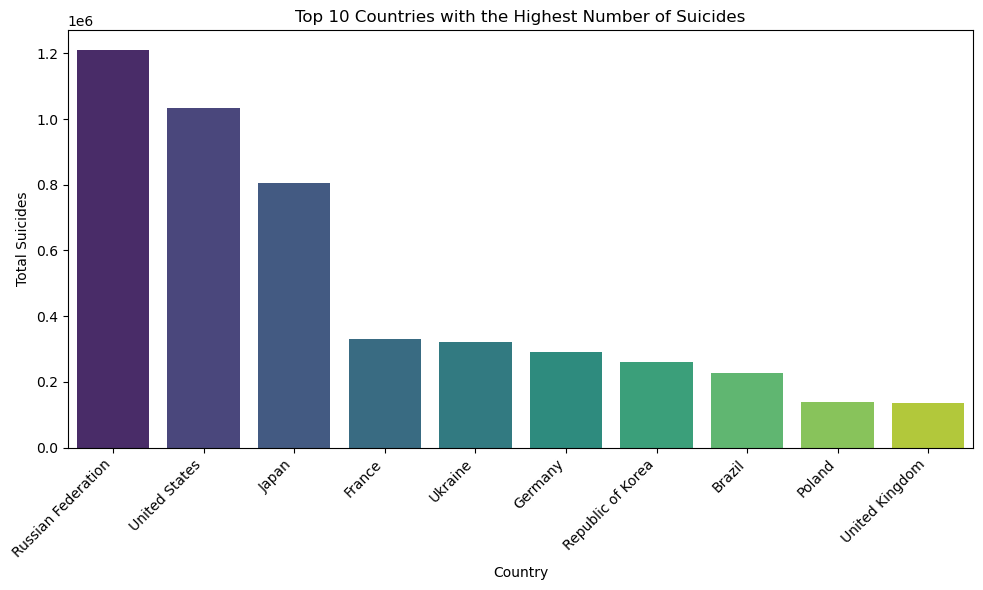

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='suicides_no', data=df.groupby('ï»¿country')['suicides_no'].sum().nlargest(10).reset_index(), palette='viridis')
plt.xlabel('Country')
plt.ylabel('Total Suicides')
plt.title('Top 10 Countries with the Highest Number of Suicides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Top countries with lowest total suicides

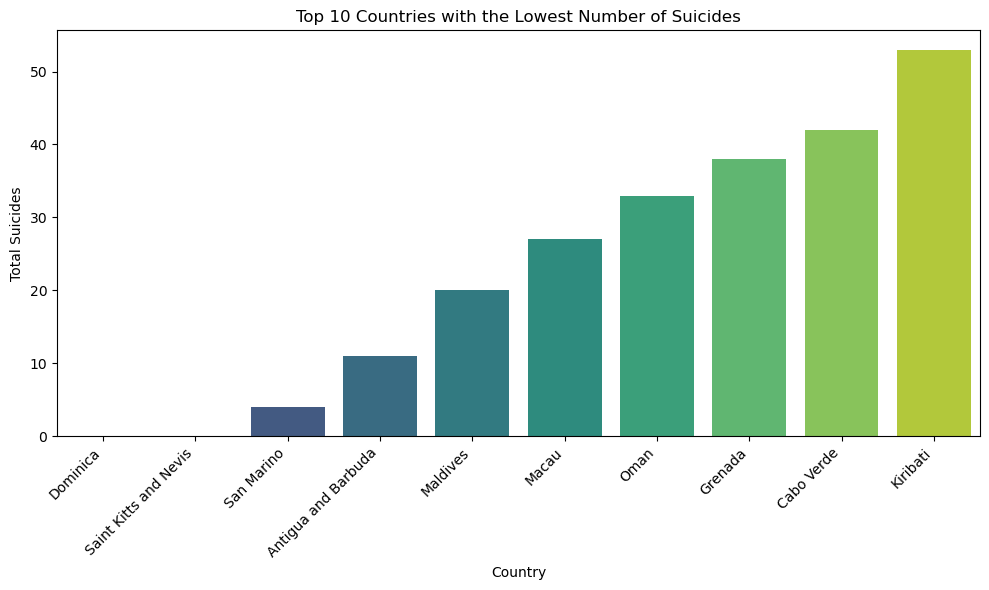

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='suicides_no', data=df.groupby('ï»¿country')['suicides_no'].sum().nsmallest(10).reset_index(), palette='viridis')
plt.xlabel('Country')
plt.ylabel('Total Suicides')
plt.title('Top 10 Countries with the Lowest Number of Suicides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

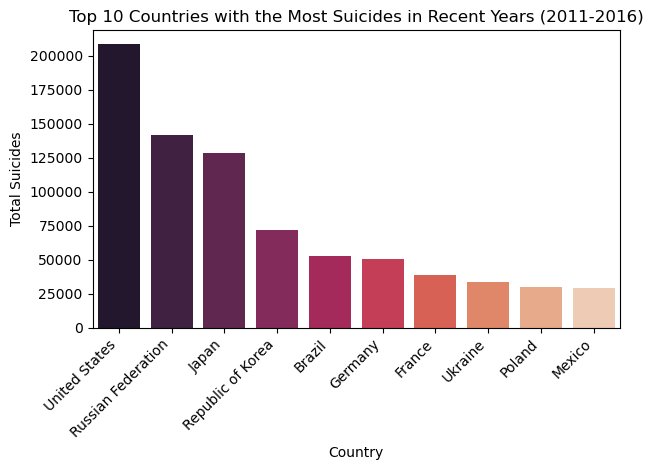

In [14]:
start,end = 2011, 2016
top_countries_recent = df[df['year'].between(start,end)].groupby('country')['suicides_no'].sum().nlargest(10)
sns.barplot(x=top_countries_recent.index, y=top_countries_recent.values, palette='rocket')
plt.xlabel('Country')
plt.ylabel('Total Suicides')
plt.title(f'Top 10 Countries with the Most Suicides in Recent Years ({start}-{end})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Suicides over time in any country 

Let's do it for Russia

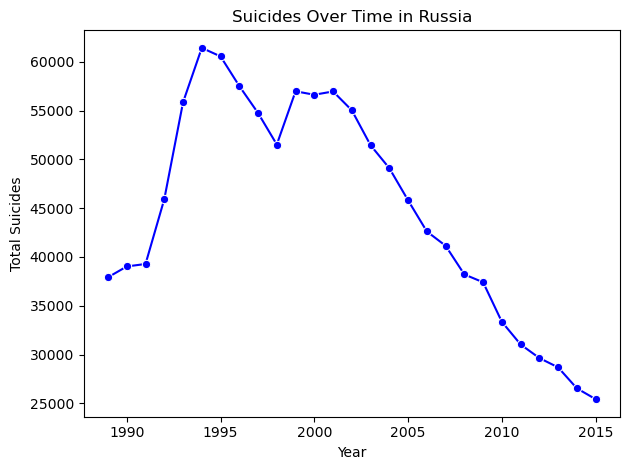

In [15]:
warnings.simplefilter(action='ignore', category=FutureWarning)
russia_data = df[df['country'] == 'Russian Federation']
suicides_over_time_russia = russia_data.groupby('year')['suicides_no'].sum()
sns.lineplot(x=suicides_over_time_russia.index, y=suicides_over_time_russia.values, marker='o', color='blue').set_title('Suicides Over Time in Russia')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.tight_layout()
plt.show()

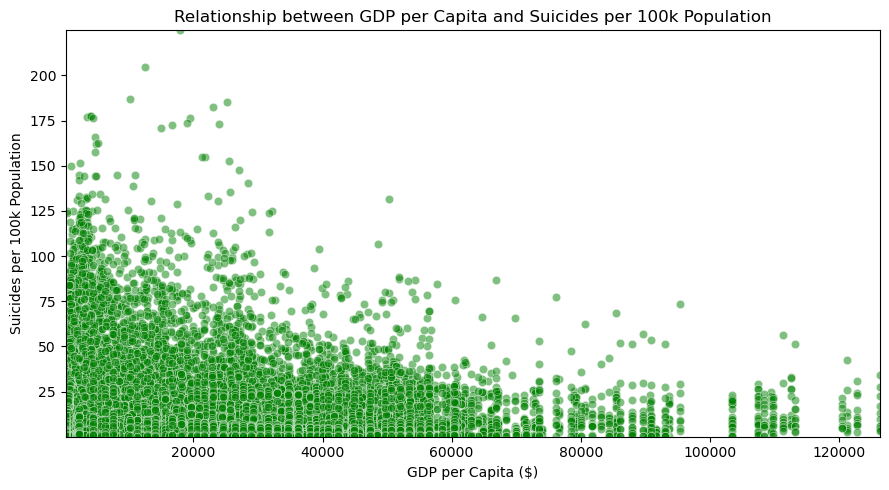

In [16]:
filtered_data = df[(df['suicides/100k pop'] != 0) & (df['gdp_per_capita ($)'] != 0)]
plt.figure(figsize=(9, 5))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=filtered_data, alpha=0.5,color='green')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k Population')
plt.title('Relationship between GDP per Capita and Suicides per 100k Population')
plt.xlim(filtered_data['gdp_per_capita ($)'].min(), filtered_data['gdp_per_capita ($)'].max())
plt.ylim(filtered_data['suicides/100k pop'].min(), filtered_data['suicides/100k pop'].max())
plt.tight_layout()

The scatterplot above illustrates that GDP per capita (the total income of a country divided by the number of people living in that country) is a key factor in suicides. Low GDP per capita is associated with higher suicide rates, and vice versa. This suggests that the economic condition of the people is one of the reasons for suicides.